In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.8.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables/2024_baseline")
figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig S9: General embedding for the updated data

## Import

In [7]:
tsne = np.load(variables_path / "tsne_bert_sep.npy")

In [8]:
tsne_rot = np.vstack((-tsne[:, 1], -tsne[:, 0])).T

In [9]:
# load
# legend colors
pickle_in = open(variables_path / "colors_2024_legend.pkl", "rb")
colors_2024_legend = pickle.load(pickle_in)

colors_2024 = np.load(variables_path / "colors_2024.npy", allow_pickle=True)

In [10]:
# save
colors_per_year_2024 = np.load(variables_path / "colors_per_year_2024.npy")

In [23]:
# load
# legend colors
pickle_in = open(
    variables_path / "colors_2024_legend_with_dentistry.pkl", "rb"
)
colors_2024_legend_with_dentistry = pickle.load(pickle_in)

colors_2024_with_dentistry = np.load(
    variables_path / "colors_2024_with_dentistry.npy", allow_pickle=True
)

In [24]:
colors_2024_with_dentistry_2 = np.where(
    colors_2024_with_dentistry == "#8675ba",
    "#8e4d8a",
    colors_2024_with_dentistry,
)

In [25]:
colors_2024_legend_with_dentistry["dentistry"] = "#8e4d8a"

In [28]:
print(np.sum(colors_2024_with_dentistry_2 != "lightgrey"))
print(
    np.sum(colors_2024_with_dentistry_2 != "lightgrey")
    / colors_2024_with_dentistry_2.shape[0]
    * 100
)

8028583
34.326198252406904


## Plot

/gpfs01/berens/user/rgonzalesmarquez/phd/pubmed-landscape/pubmed_landscape_src/plotting.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([x[i],center_cluster_coordinates_left.x[i]],[y[i],center_cluster_coordinates_left.y[i]], c=colr, linewidth=0.4, clip_on=False)
/gpfs01/berens/user/rgonzalesmarquez/phd/pubmed-landscape/pubmed_landscape_src/plotting.py:436: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([x[i],center_cluster_coordinates_left.x[i]],[y[i],center_cluster_coordinates_left.y[i]], c=colr, linewidth=0.4, clip_on=False)
/gpfs01/berens/user/rgonzalesmarquez/phd/pubmed-landscape/pubmed_lands

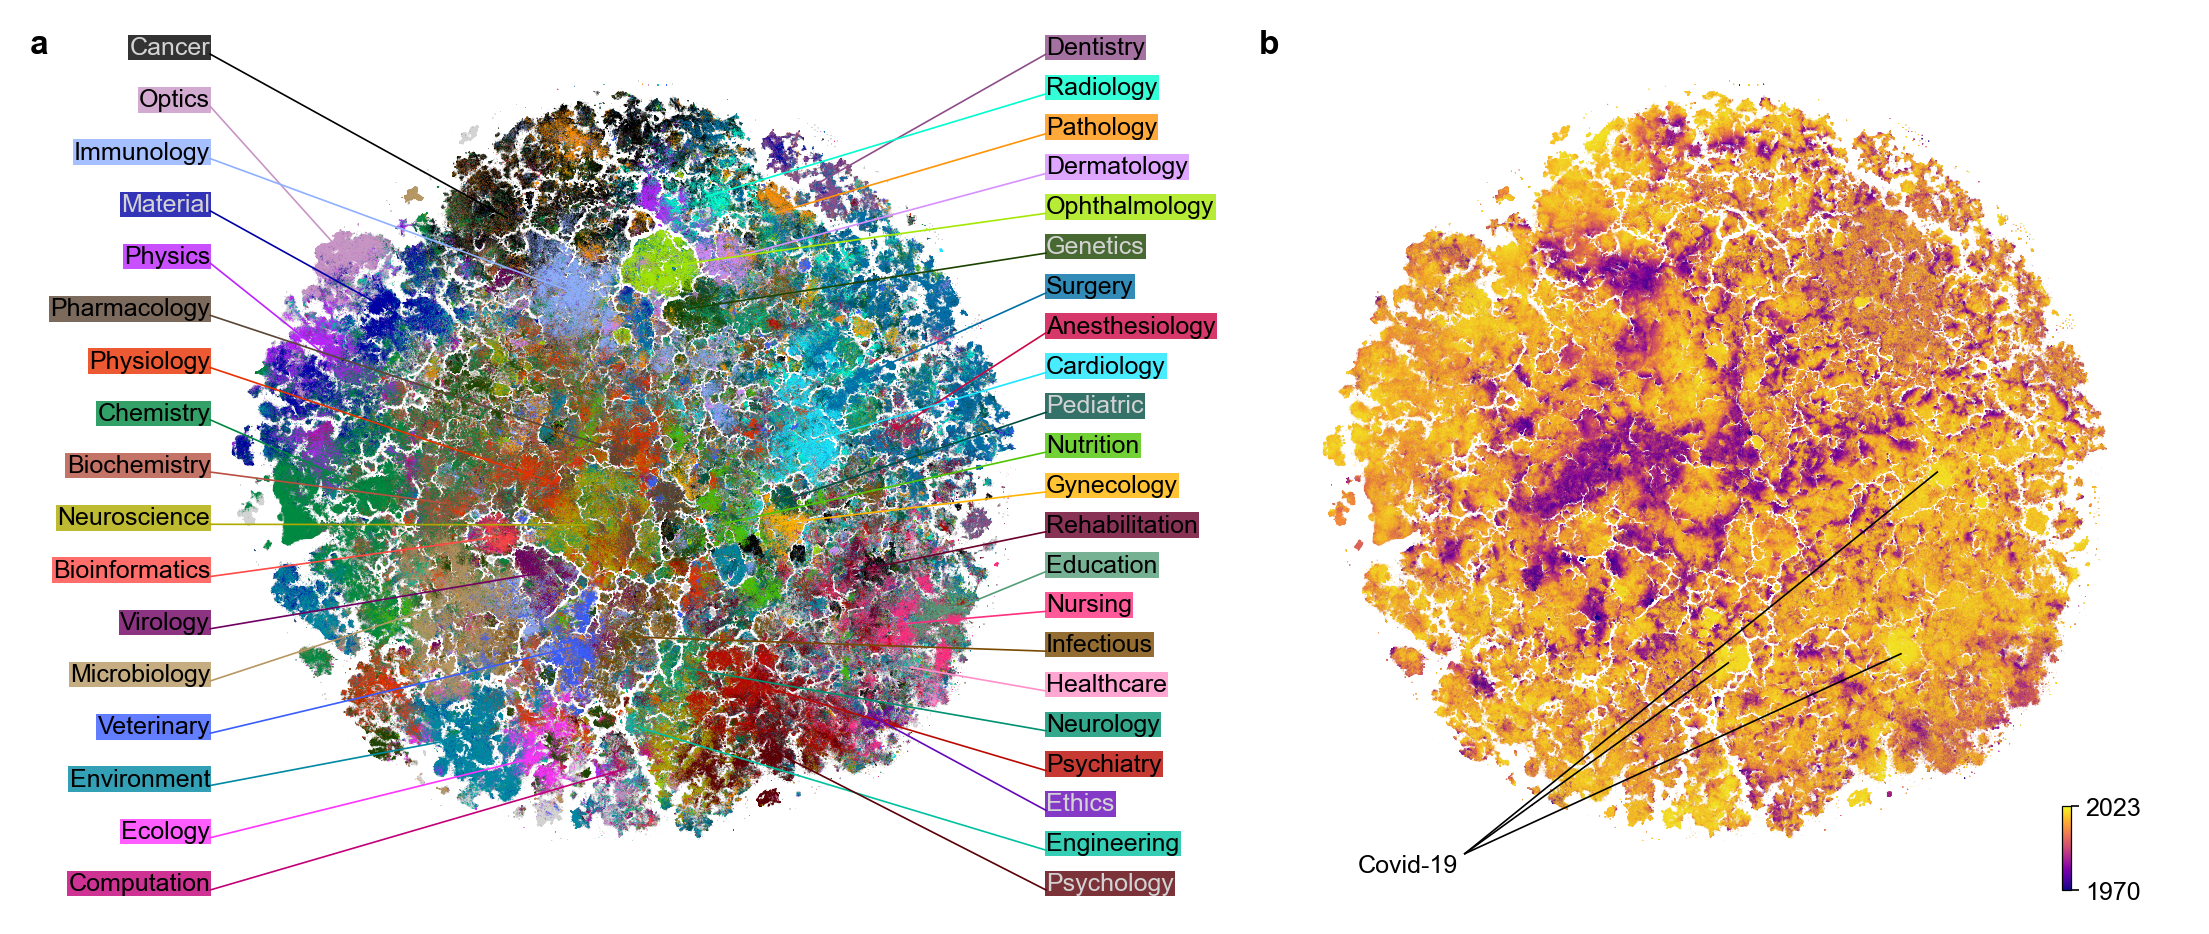

In [27]:
%matplotlib inline

fig, ax = plt.subplots(
    1, 2, figsize=(7.2, 3.0), dpi=300, sharey=True, layout="constrained"
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-230, 230)
y_lim = (-230, 230)


# subplot 1
plot_tsne_colors(
    tsne_rot,
    colors_2024_with_dentistry_2,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    plot_type="subplot_3",
)
plot_label_tags(
    tsne_rot,
    colors_2024_with_dentistry_2,
    colors_2024_legend_with_dentistry,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    fontsize=6,
    rs=2,
)
ax[0].text(
    -0.15,
    1.03,
    string.ascii_lowercase[0],
    transform=ax[0].transAxes,
    **txtkwargs
)

# subplot 2
plot_tsne_years(
    tsne_rot,
    colors_per_year_2024,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[1],
    fontsize=6,
    colorbar=True,
    plot_type="subplot",
    top_year="2023",
)
ax[1].plot([5, -140], [-105, -210], c="k", linewidth=0.4)
ax[1].plot([100, -140], [-100, -210], c="k", linewidth=0.4)
ax[1].plot([120, -140], [0, -210], c="k", linewidth=0.4)
ax[1].text(-144, -210, "Covid-19", fontsize=6, ha="right", va="top")
ax[1].text(
    0, 1.03, string.ascii_lowercase[1], transform=ax[1].transAxes, **txtkwargs
)

fig.savefig(figures_path / "fig_updated_general_embedding_v5.png", dpi=300)
fig.savefig(figures_path / "fig_updated_general_embedding_v5.pdf", dpi=300)